In [1]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

one_hot_df = pd.read_csv('Data/allData/PrisonAdmissionsCleanOneHotEncoding.csv')
one_hot_df.drop(columns=['STATE', 'RACE', 'OFFDETAIL', 'OFFGENERAL'], inplace=True)

In [2]:
one_hot_df.head()

,SEX,EDUCATION,ADMITYR,SENTLGTH,AGEADMIT,AK,AL,AR,AZ,CA,...,larceny,motor vehicle theft,murder,negligent manslaugher,other property,other violent,public order,rape/SA,robbery,unspecified
0,1.0,2.0,1991.0,2.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1991.0,0.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,2.0,1991.0,3.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1.0,1991.0,3.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.0,2.0,1991.0,2.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# "independent" variables
feature_cols = list(one_hot_df.columns.values)
feature_cols.remove('SENTLGTH')

X = one_hot_df[feature_cols] # Features
y = one_hot_df['SENTLGTH'] # Target variable

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(max_depth=15, max_leaf_nodes=120, n_estimators=90, max_features=50)
history = rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# compare training and test accuracy
print("Training Accuracy: " + str(rf.score(X_train, y_train)))
print("Test Accuracy: " + str(rf.score(X_test, y_test)))

mae = str(np.mean(abs(rf_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

# save model
import pickle
pickle.dump(rf, open('prisonAdmissionsModel.sav', 'wb'))


Training Accuracy: 0.4634701592294156
Test Accuracy: 0.463053989553081
Mean Absolute Error: 0.8782435233071211


In [7]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

In [38]:
texas_df = pd.read_csv('Data/stateData/oneHotDfTexas.csv')
florida_df = pd.read_csv('Data/stateData/oneHotDfFlorida.csv')
new_york_df = pd.read_csv('Data/stateData/oneHotDfNewYork.csv')
illinois_df = pd.read_csv('Data/stateData/oneHotDfIllinois.csv')
north_carolina_df = pd.read_csv('Data/stateData/oneHotDfNC.csv')
california_df = pd.read_csv('Data/stateData/oneHotDfCA.csv')
arizona_df = pd.read_csv('Data/stateData/oneHotDfAZ.csv')
sc_df = pd.read_csv('Data/stateData/oneHotDfSC.csv')
mo_df = pd.read_csv('Data/stateData/oneHotDfMO.csv')
in_df = pd.read_csv('Data/stateData/oneHotDfIN.csv')
pa_df = pd.read_csv('Data/stateData/oneHotDfPA.csv')

In [51]:
detailed_offense = ["murder", "negligent manslaugher", "rape/SA", "robbery", "assault", "other violent", "burglary", "larceny", "motor vehicle theft", "fraud", "other property", "drugs", "public order", "unspecified"]

def train_text_model(df, year, offense):
    # only want rows from 2020
    new_df = df[df['ADMITYR'] == float(year)]

    # drop columns that are not needed
    new_df = new_df.drop(['ADMITYR'], axis=1)
    new_df = new_df[new_df['OFFGENERAL'] == offense]
    new_df = new_df.drop(detailed_offense, axis=1)
    
    # "independent" variables
    feature_cols = list(new_df.columns.values)
    feature_cols.remove('SENTLGTH')

    x = new_df[feature_cols] # Features
    y = new_df['SENTLGTH'] # Target variable

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    return X_train, X_test, y_train, y_test

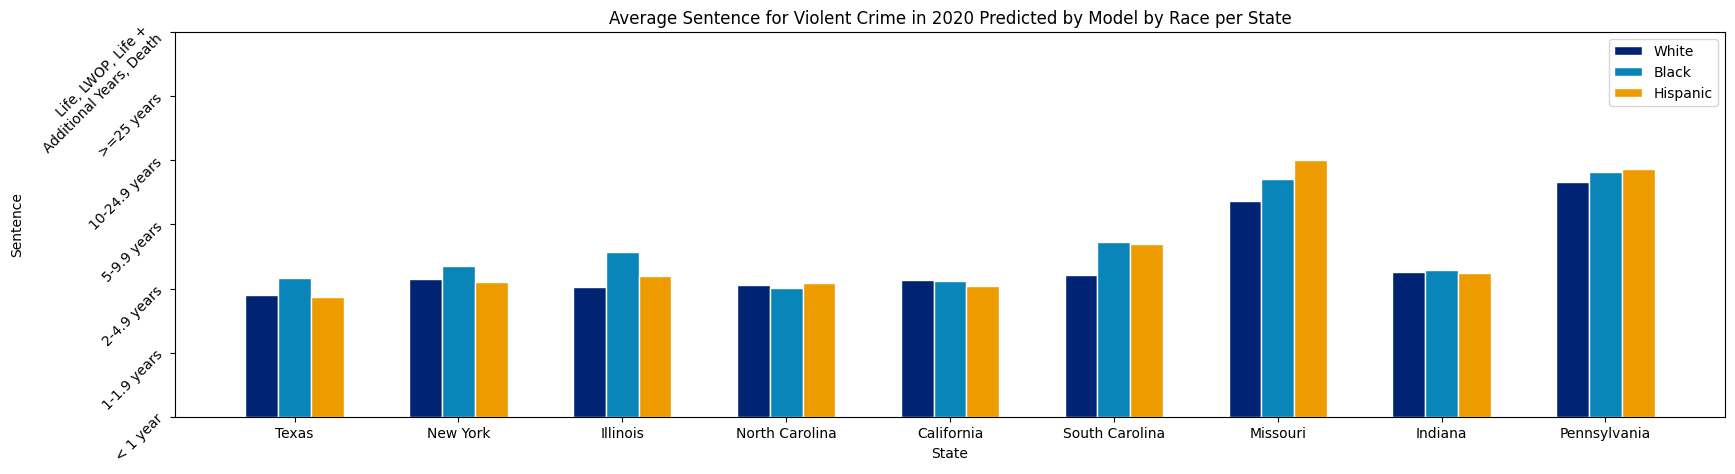

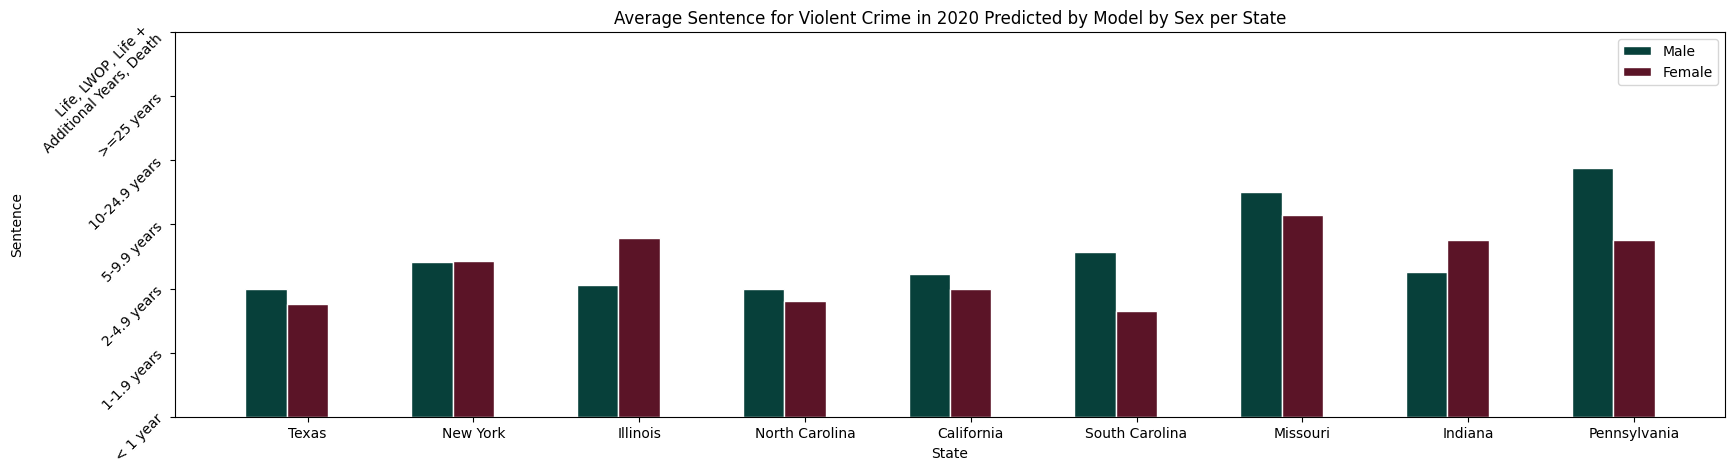

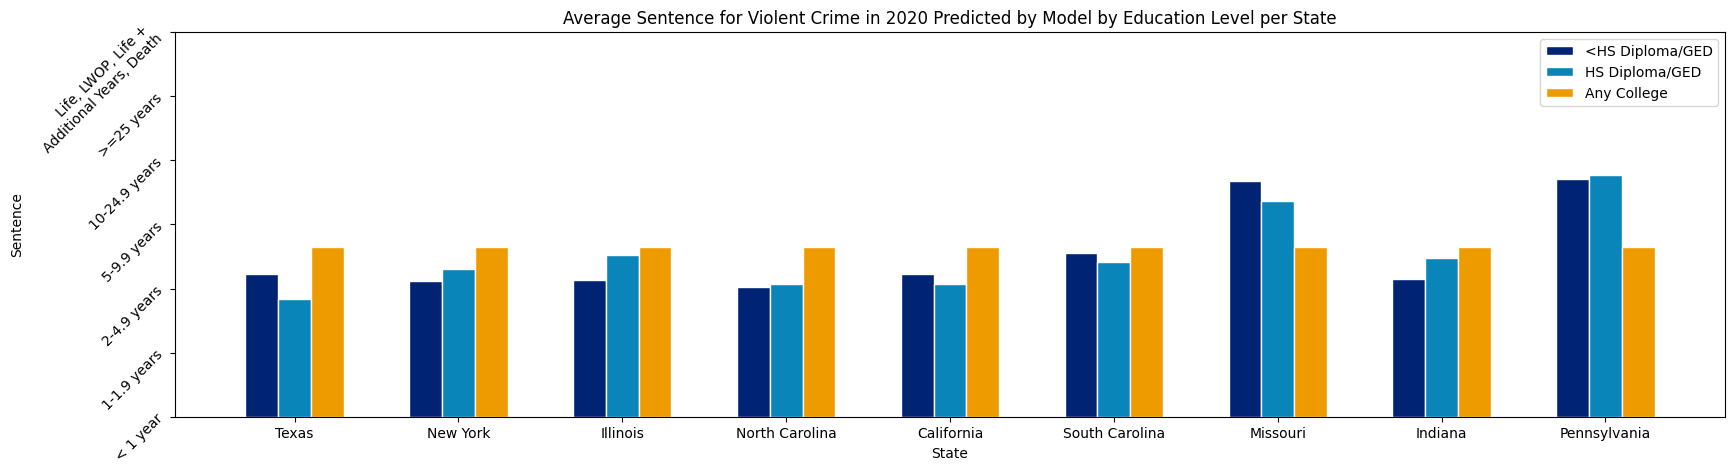

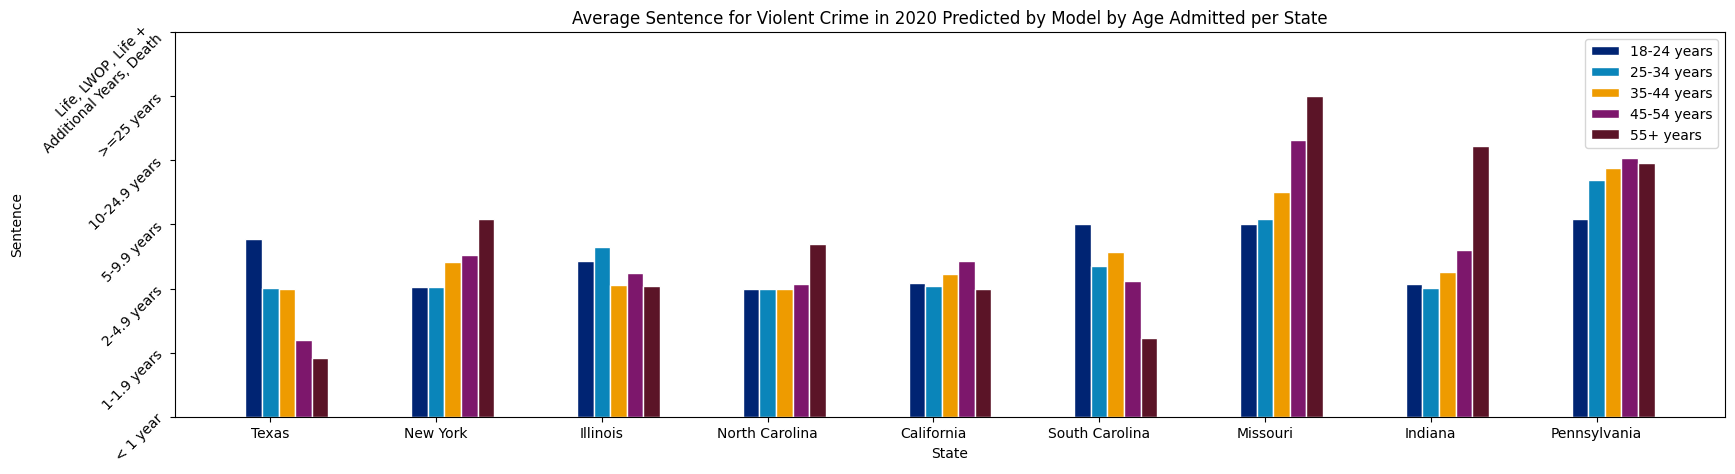

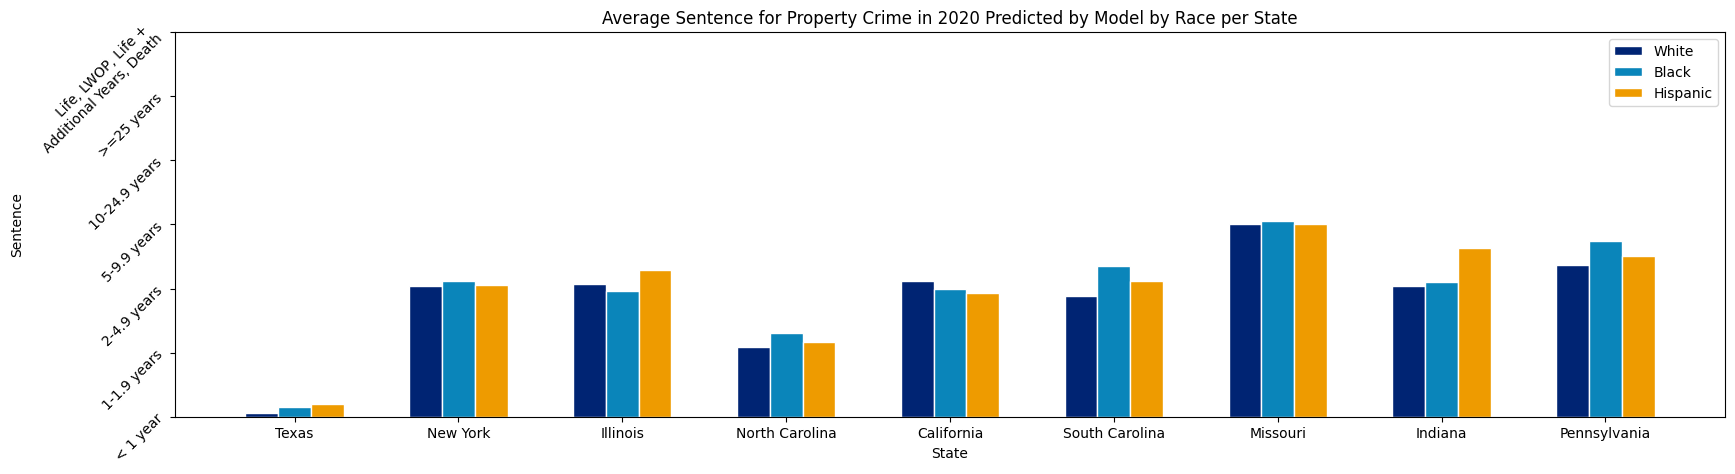

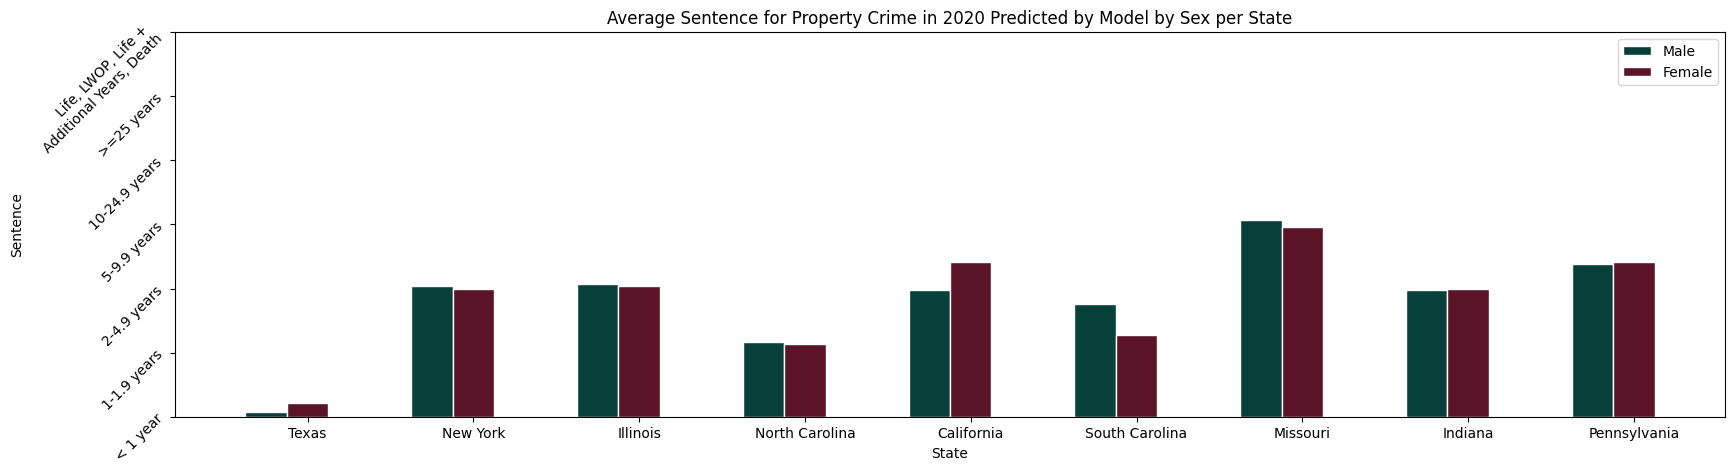

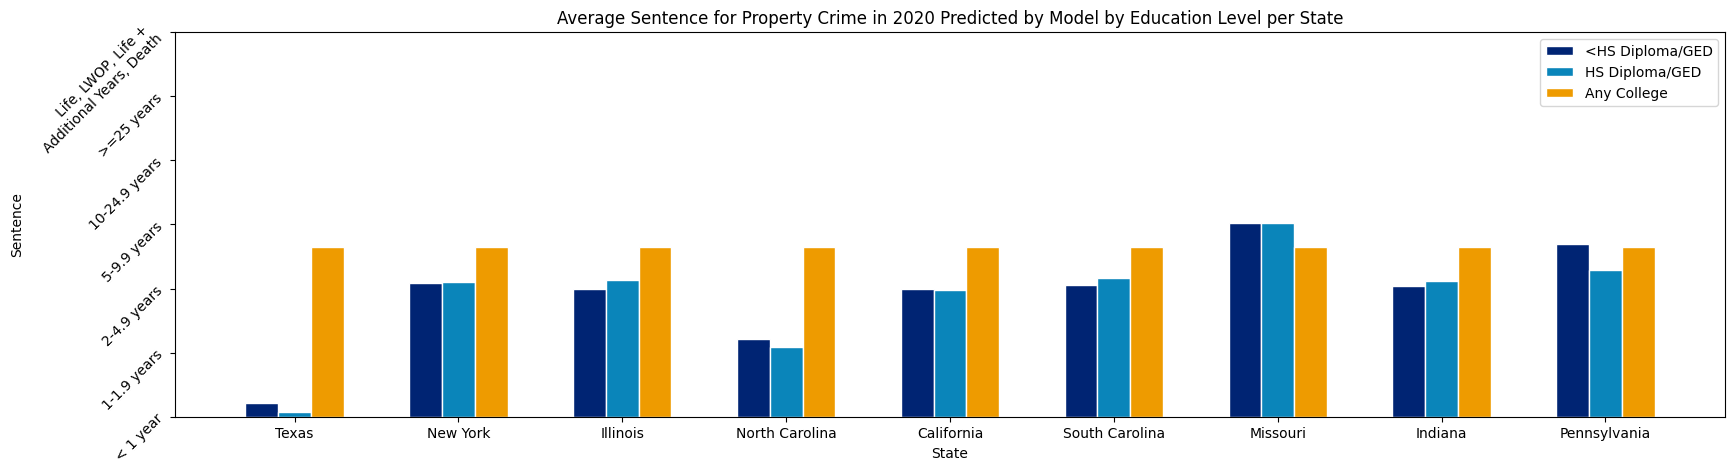

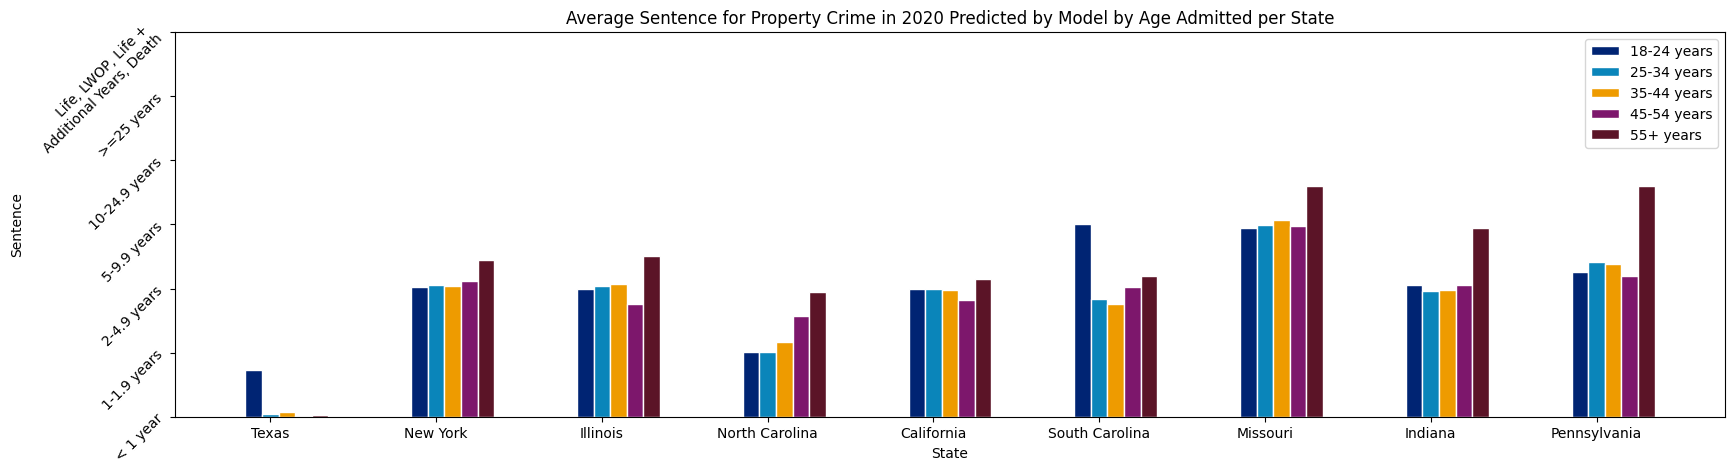

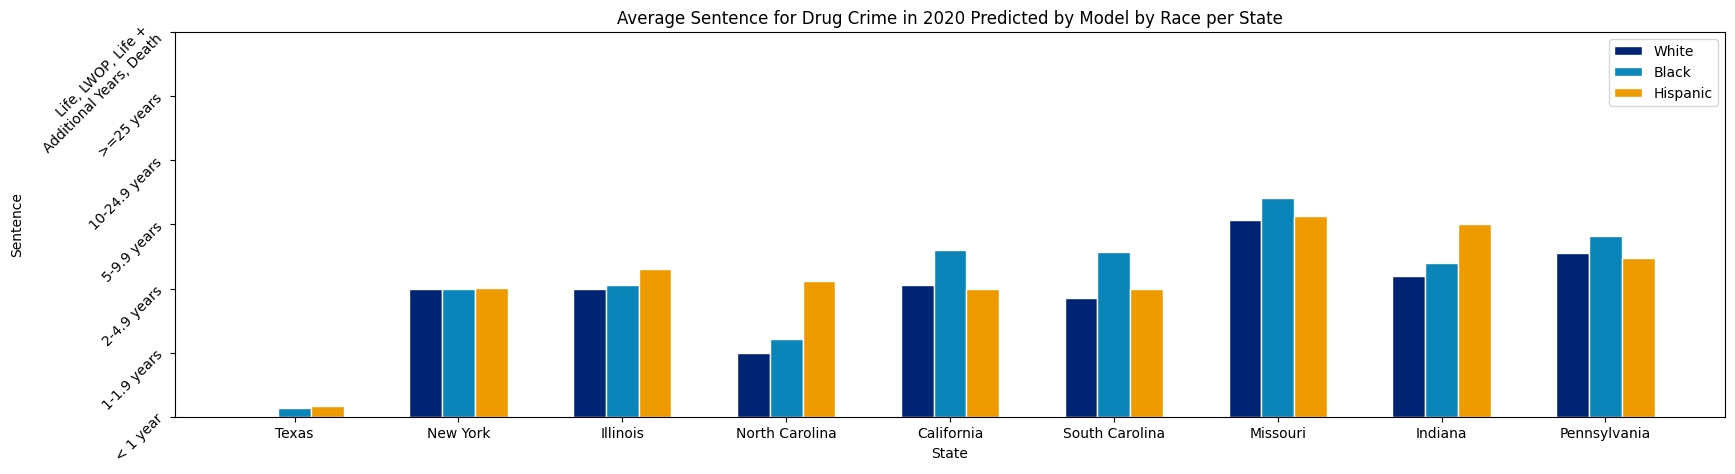

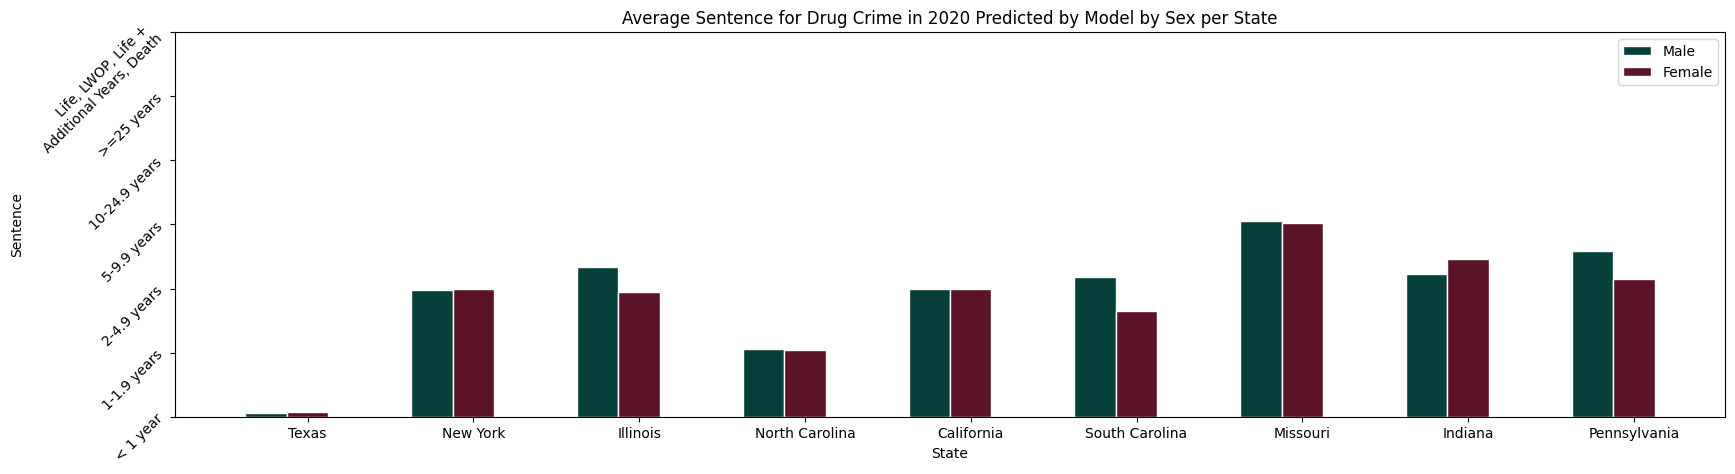

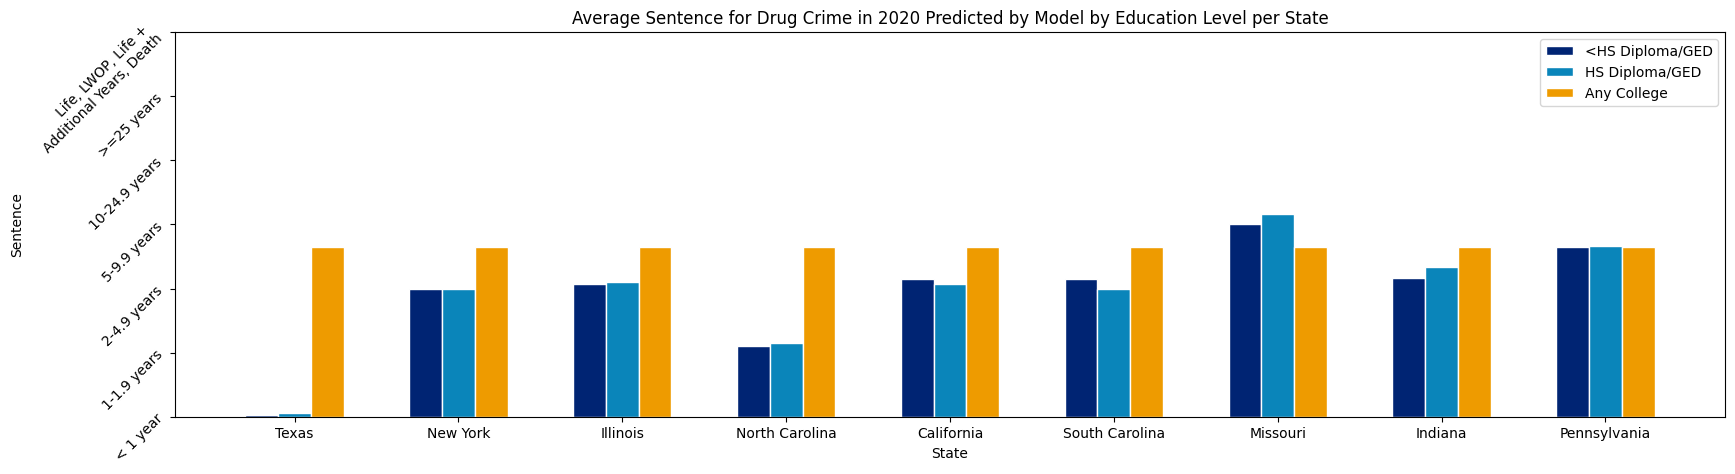

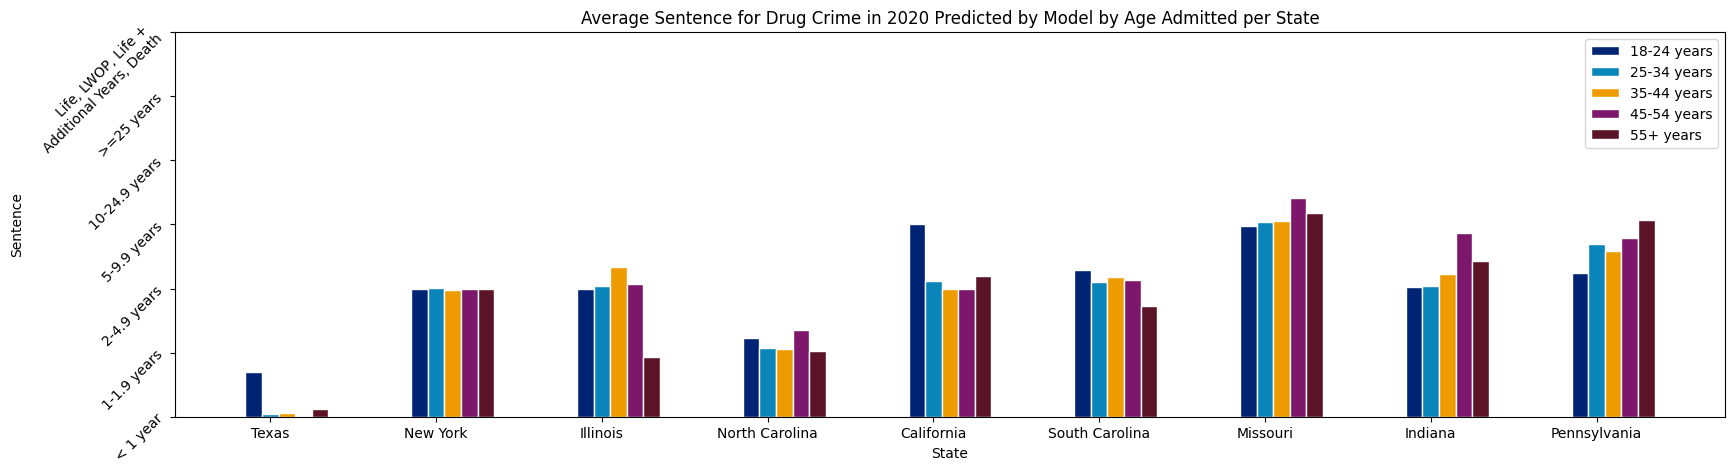

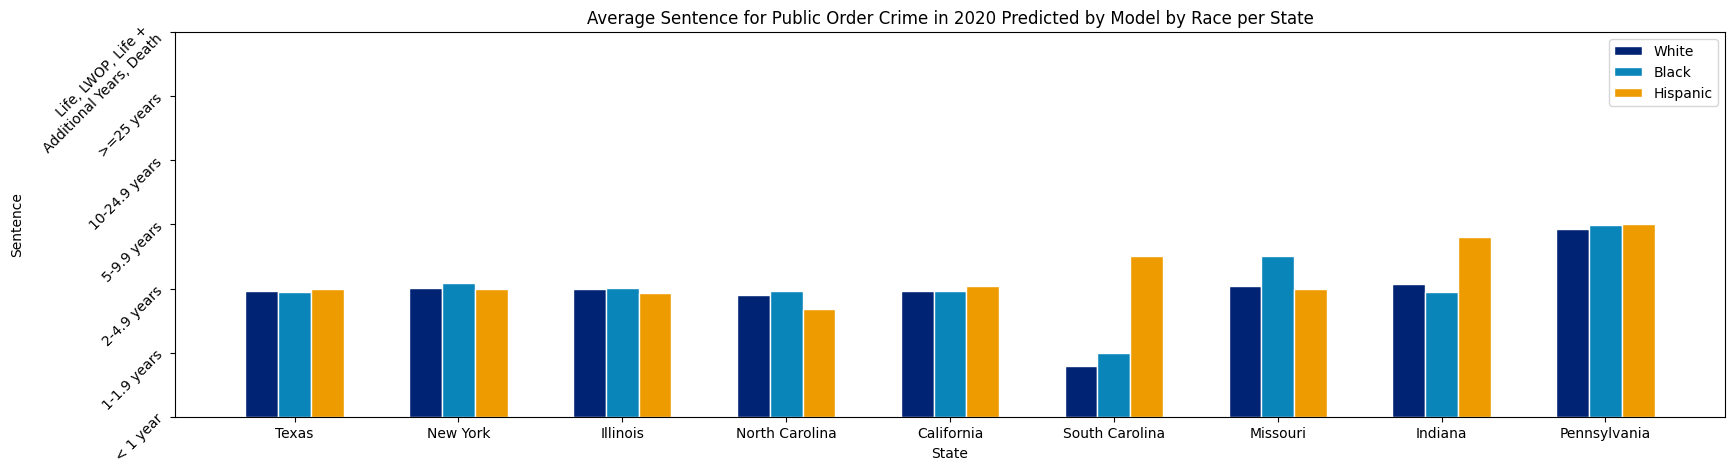

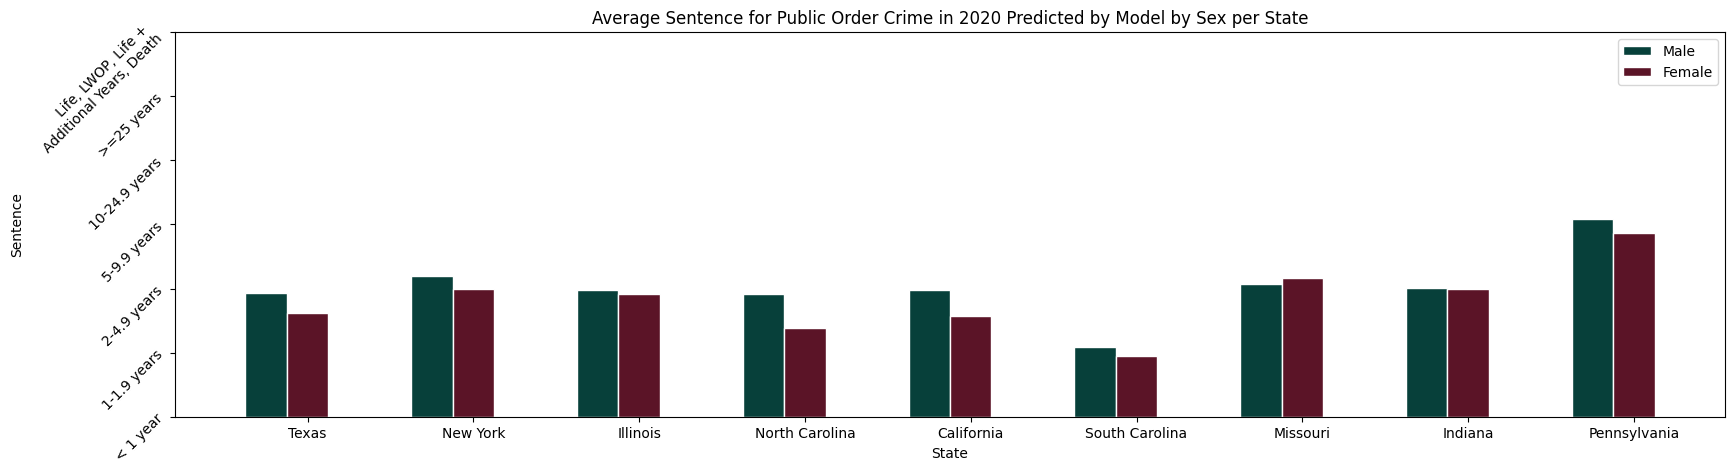

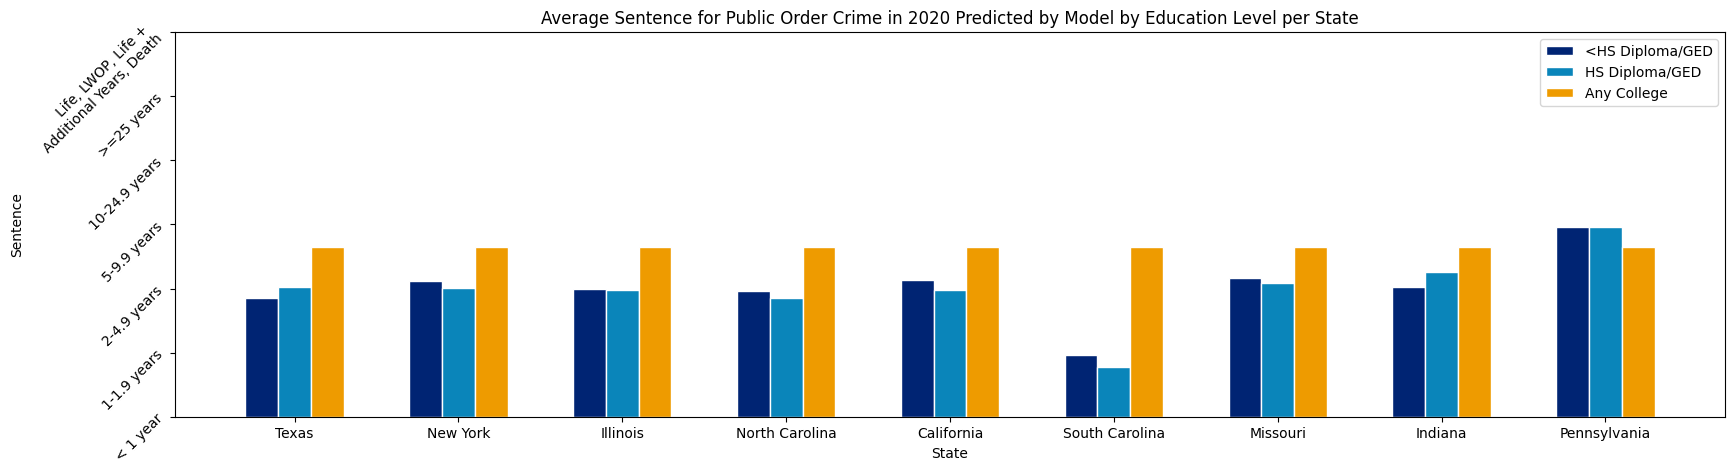

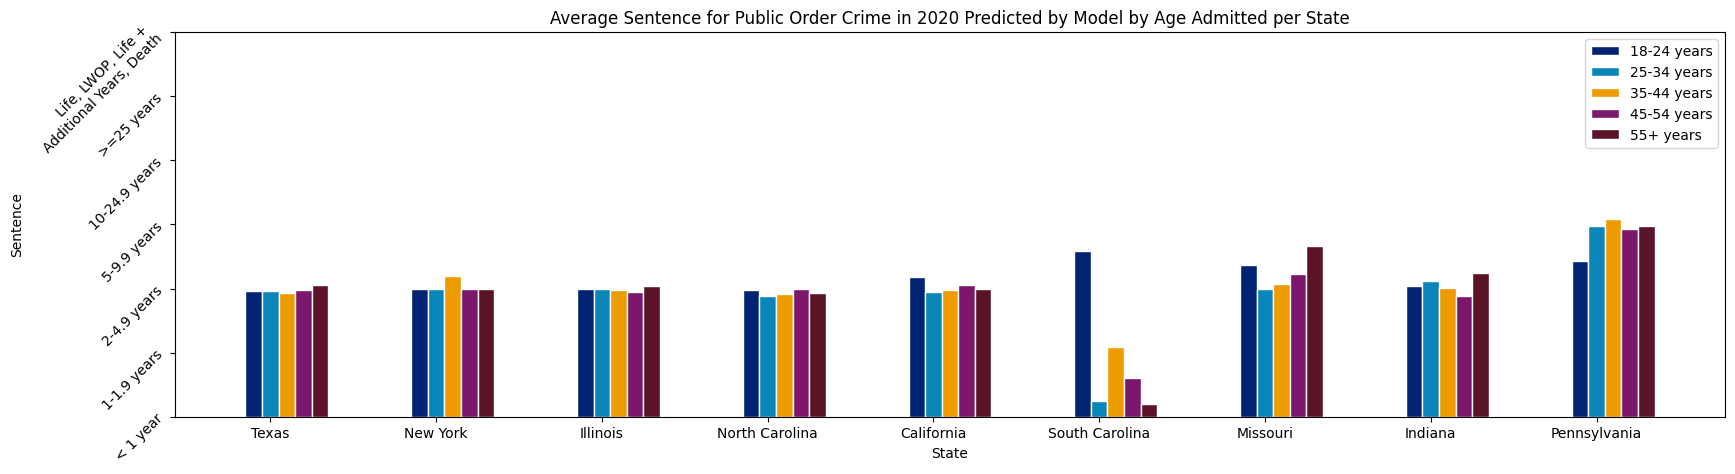

In [90]:
# Random Forest Model
feature_importance = []
feature_cols = []
states = ['Texas', 'New York', 'Illinois', 'North Carolina', 'California', 'South Carolina', 'Missouri', 'Indiana', 'Pennsylvania']
off_general = ['Violent', 'Property', 'Drug', 'Public Order']
colors = ["#002473", "#0A85BA", "#ee9b00", "#7d176c", "#5b1427","#e7d498",  "#07403a", "#d15400", "#1d085b", "#91080c","#431a51", "#bb3e03",  "#DFA591", "#BD0058"]

for inx, off in enumerate(off_general):
    
    means = []
    white_means = []
    black_means = []
    hispanic_means = []
    male_means = []
    female_means = []
    no_hs_means = []
    hs_means = []
    some_college_means = []
    young_means = []
    youngadult_means = []
    middle_means = []
    middle_aged_means = []
    old_means = []

    # only using states for which data is available in 2020
    for index, state_df in enumerate([texas_df, new_york_df, illinois_df, north_carolina_df, california_df, sc_df, mo_df, in_df, pa_df]):
        
        X_train, X_test, y_train, y_test = train_text_model(state_df, 2020, inx + 1)

        rf = RandomForestClassifier(max_depth=15, max_leaf_nodes=120, n_estimators=90, max_features=50)
        rf.fit(X_train, y_train)

        rf_pred = rf.predict(X_test)
        rf_predw = rf.predict(X_test[X_test['white'] == 1])
        rf_predb = rf.predict(X_test[X_test['black'] == 1])
        rf_predh = rf.predict(X_test[X_test['hispanic'] == 1])
        rf_predm = rf.predict(X_test[X_test['SEX'] == 1])
        rf_predf = rf.predict(X_test[X_test['SEX'] == 2])
        rf_prednhs = rf.predict(X_test[X_test['EDUCATION'] == 1])
        rf_predhs = rf.predict(X_test[X_test['EDUCATION'] == 2])
        # rf_predc = rf.predict(X_test[X_test['EDUCATION'] == 3])
        rf_predy = rf.predict(X_test[X_test['AGEADMIT'] == 1])
        rf_predya = rf.predict(X_test[X_test['AGEADMIT'] == 2])
        rf_predm = rf.predict(X_test[X_test['AGEADMIT'] == 3])
        rf_predma = rf.predict(X_test[X_test['AGEADMIT'] == 4])
        rf_predo = rf.predict(X_test[X_test['AGEADMIT'] == 5])

        # print average sentence length predicted by model 
        # print("Average sentence length predicted by model: ", np.mean(rf_pred))
        means.append(np.mean(rf_pred))

        # print average sentence length for white, black, and hispanic inmates
        # print("Average sentence length for white inmates: ", np.mean(rf_predw))
        white_means.append(np.mean(rf_predw))

        # print("Average sentence length for black inmates: ", np.mean(rf_predb))
        black_means.append(np.mean(rf_predb))

        # print("Average sentence length for hispanic inmates: ", np.mean(rf_predh))
        hispanic_means.append(np.mean(rf_predh))

        # prediction by sex
        male_means.append(np.mean(rf_predm))
        female_means.append(np.mean(rf_predf))

        # prediction by education 
        no_hs_means.append(np.mean(rf_prednhs))
        hs_means.append(np.mean(rf_predhs))
        some_college_means.append(np.mean(rf_predc))

        # prediction by age
        young_means.append(np.mean(rf_predy))
        youngadult_means.append(np.mean(rf_predya))
        middle_means.append(np.mean(rf_predm))
        middle_aged_means.append(np.mean(rf_predma))
        old_means.append(np.mean(rf_predo))

        # compare training and test accuracy
        # print("Training Accuracy: " + str(rf.score(X_train, y_train)))
        # print("Test Accuracy: " + str(rf.score(X_test, y_test)))
        # print("Mean Absolute Error: " + str(np.mean(abs(rf_pred - y_test))))

        # save the trained model
        # filename = 'Models/' + states[index] + 'GradientBoostingModel.sav'
        # pickle.dump(rf, open(filename, 'wb'))

    # Race Plot
    bar_width = 0.20 
    r1 = np.arange(len(white_means))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    plt.bar(r1, white_means, color=colors[0], width=bar_width, edgecolor='white', label='White')
    plt.bar(r2, black_means, color=colors[1], width=bar_width, edgecolor='white', label='Black')
    plt.bar(r3, hispanic_means, color=colors[2], width=bar_width, edgecolor='white', label='Hispanic')
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.yticks(np.arange(0, 7, 1), labels=["< 1 year", "1-1.9 years", "2-4.9 years", "5-9.9 years", "10-24.9 years", ">=25 years", "Life, LWOP, Life + \nAdditional Years, Death"])
    plt.yticks(rotation=45)
    plt.xlabel("State")
    plt.xticks([r + bar_width for r in range(len(white_means))], states)
    plt.ylabel("Sentence")
    plt.title("Average Sentence for " + off_general[inx] + " Crime in 2020 Predicted by Model by Race per State")
    plt.legend()
    plt.savefig("ModelGraphs/averageSentence" + off_general[inx] + ".png")
    plt.show()

    # Sex Plot
    bar_width = 0.25 
    r1 = np.arange(len(male_means))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    plt.bar(r1, male_means, color=colors[6], width=bar_width, edgecolor='white', label='Male')
    plt.bar(r2, female_means, color=colors[4], width=bar_width, edgecolor='white', label='Female')
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.yticks(np.arange(0, 7, 1), labels=["< 1 year", "1-1.9 years", "2-4.9 years", "5-9.9 years", "10-24.9 years", ">=25 years", "Life, LWOP, Life + \nAdditional Years, Death"])
    plt.yticks(rotation=45)
    plt.xlabel("State")
    plt.xticks([r + bar_width for r in range(len(male_means))], states)
    plt.ylabel("Sentence")
    plt.title("Average Sentence for " + off_general[inx] + " Crime in 2020 Predicted by Model by Sex per State")
    plt.legend()
    plt.savefig("ModelGraphs/averageSentencebySex" + off_general[inx] + ".png")
    plt.show()

    # Education Plot
    bar_width = 0.20
    r1 = np.arange(len(no_hs_means))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    plt.bar(r1, no_hs_means, color=colors[0], width=bar_width, edgecolor='white', label='<HS Diploma/GED')
    plt.bar(r2, hs_means, color=colors[1], width=bar_width, edgecolor='white', label='HS Diploma/GED')
    plt.bar(r3, some_college_means, color=colors[2], width=bar_width, edgecolor='white', label='Any College')
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.yticks(np.arange(0, 7, 1), labels=["< 1 year", "1-1.9 years", "2-4.9 years", "5-9.9 years", "10-24.9 years", ">=25 years", "Life, LWOP, Life + \nAdditional Years, Death"])
    plt.yticks(rotation=45)
    plt.xlabel("State")
    plt.xticks([r + bar_width for r in range(len(hs_means))], states)
    plt.ylabel("Sentence")
    plt.title("Average Sentence for " + off_general[inx] + " Crime in 2020 Predicted by Model by Education Level per State")
    plt.legend()
    plt.savefig("ModelGraphs/averageSentencebyEducation" + off_general[inx] + ".png")
    plt.show()

    # Age Plot
    bar_width = 0.10
    r1 = np.arange(len(male_means))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]
    r5 = [x + bar_width for x in r4]
    
    plt.bar(r1, young_means, color=colors[0], width=bar_width, edgecolor='white', label='18-24 years')
    plt.bar(r2, youngadult_means, color=colors[1], width=bar_width, edgecolor='white', label='25-34 years')
    plt.bar(r3, middle_means, color=colors[2], width=bar_width, edgecolor='white', label='35-44 years')
    plt.bar(r4, middle_aged_means, color=colors[3], width=bar_width, edgecolor='white', label='45-54 years')
    plt.bar(r5, old_means, color=colors[4], width=bar_width, edgecolor='white', label='55+ years')
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.yticks(np.arange(0, 7, 1), labels=["< 1 year", "1-1.9 years", "2-4.9 years", "5-9.9 years", "10-24.9 years", ">=25 years", "Life, LWOP, Life + \nAdditional Years, Death"])
    plt.yticks(rotation=45)
    plt.xlabel("State")
    plt.xticks([r + bar_width for r in range(len(male_means))], states)
    plt.ylabel("Sentence")
    plt.title("Average Sentence for " + off_general[inx] + " Crime in 2020 Predicted by Model by Age Admitted per State")
    plt.legend()
    plt.savefig("ModelGraphs/averageSentencebyAgeAdmit" + off_general[inx] + ".png")
    plt.show()



    
